In [2]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [3]:
# 1. Carregar o dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

In [4]:
# 2. Separar os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Criar o modelo Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,        # número de árvores na floresta
    criterion='gini',        # função de avaliação das divisões
    max_depth=6,             # profundidade máxima das árvores
    min_samples_split=4,     # mínimo de amostras para dividir um nó
    min_samples_leaf=2,      # mínimo de amostras por folha
    bootstrap=True,          # usar amostragem com reposição
    random_state=42,
    n_jobs=-1                # usa todos os núcleos disponíveis
)

# 4. Treinar o modelo
rf_model.fit(X_train, y_train)

# 5. Avaliar o modelo
y_pred = rf_model.predict(X_test)

print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred, target_names=data.target_names))

Acurácia: 0.9649122807017544

Relatório de Classificação:
               precision    recall  f1-score   support

   malignant       0.98      0.93      0.95        43
      benign       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



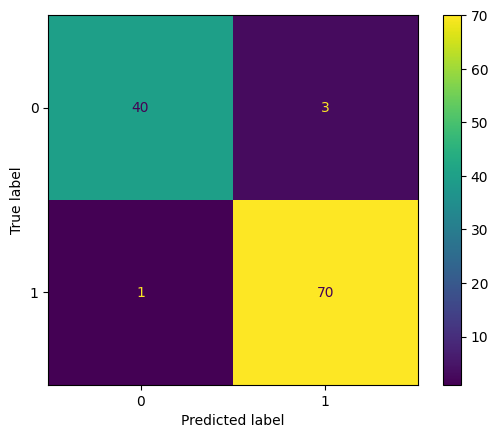

In [5]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred)).plot()
plt.grid(False)
plt.show()